<a href="https://colab.research.google.com/github/atalaydenknalbant/DBDA.X425_Assignments/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

## Check TF Version

In [2]:
print(tf.__version__)

2.6.0


## Load and Preprocess Dataset

In [3]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

4431872/4422102 [==============================] - 0s 0us/step


## View Dataset Sample

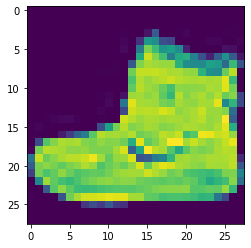

In [4]:
plt.imshow(x_train[0])
plt.show()

## Init TPU

In [25]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.19.105.18:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.19.105.18:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


## Build Model

In [68]:
with tpu_strategy.scope():
  model = keras.Sequential()

  model.add(keras.Input(shape=(None,28)))

  model.add(layers.LSTM(256,return_sequences=True,activation='tanh'))
  model.add(layers.LSTM(128,activation='tanh'))
  model.add(layers.Dense(10,activation='softmax'))

  model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy()
    ,metrics=["accuracy"]
  )

## Model Summary

In [69]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, None, 256)         291840    
_________________________________________________________________
lstm_28 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 490,250
Trainable params: 490,250
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [70]:
model.fit(x_train,y_train,batch_size=64,epochs=32,verbose=2)

Epoch 1/32
938/938 - 16s - loss: 0.5816 - accuracy: 0.7833
Epoch 2/32
938/938 - 7s - loss: 0.4041 - accuracy: 0.8499
Epoch 3/32
938/938 - 7s - loss: 0.3572 - accuracy: 0.8665
Epoch 4/32
938/938 - 7s - loss: 0.3267 - accuracy: 0.8783
Epoch 5/32
938/938 - 7s - loss: 0.2993 - accuracy: 0.8878
Epoch 6/32
938/938 - 7s - loss: 0.2811 - accuracy: 0.8936
Epoch 7/32
938/938 - 7s - loss: 0.2642 - accuracy: 0.9003
Epoch 8/32
938/938 - 7s - loss: 0.2475 - accuracy: 0.9065
Epoch 9/32
938/938 - 7s - loss: 0.2351 - accuracy: 0.9111
Epoch 10/32
938/938 - 7s - loss: 0.2191 - accuracy: 0.9168
Epoch 11/32
938/938 - 7s - loss: 0.2071 - accuracy: 0.9214
Epoch 12/32
938/938 - 7s - loss: 0.1992 - accuracy: 0.9255
Epoch 13/32
938/938 - 7s - loss: 0.1848 - accuracy: 0.9298
Epoch 14/32
938/938 - 7s - loss: 0.1741 - accuracy: 0.9328
Epoch 15/32
938/938 - 7s - loss: 0.1612 - accuracy: 0.9391
Epoch 16/32
938/938 - 7s - loss: 0.1540 - accuracy: 0.9412
Epoch 17/32
938/938 - 7s - loss: 0.1418 - accuracy: 0.9467
Epoch

## Evaluate Model

In [71]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 5s - loss: 0.3973 - accuracy: 0.9055


[0.3973102867603302, 0.9054999947547913]

## Prediction

313/313 - 2s


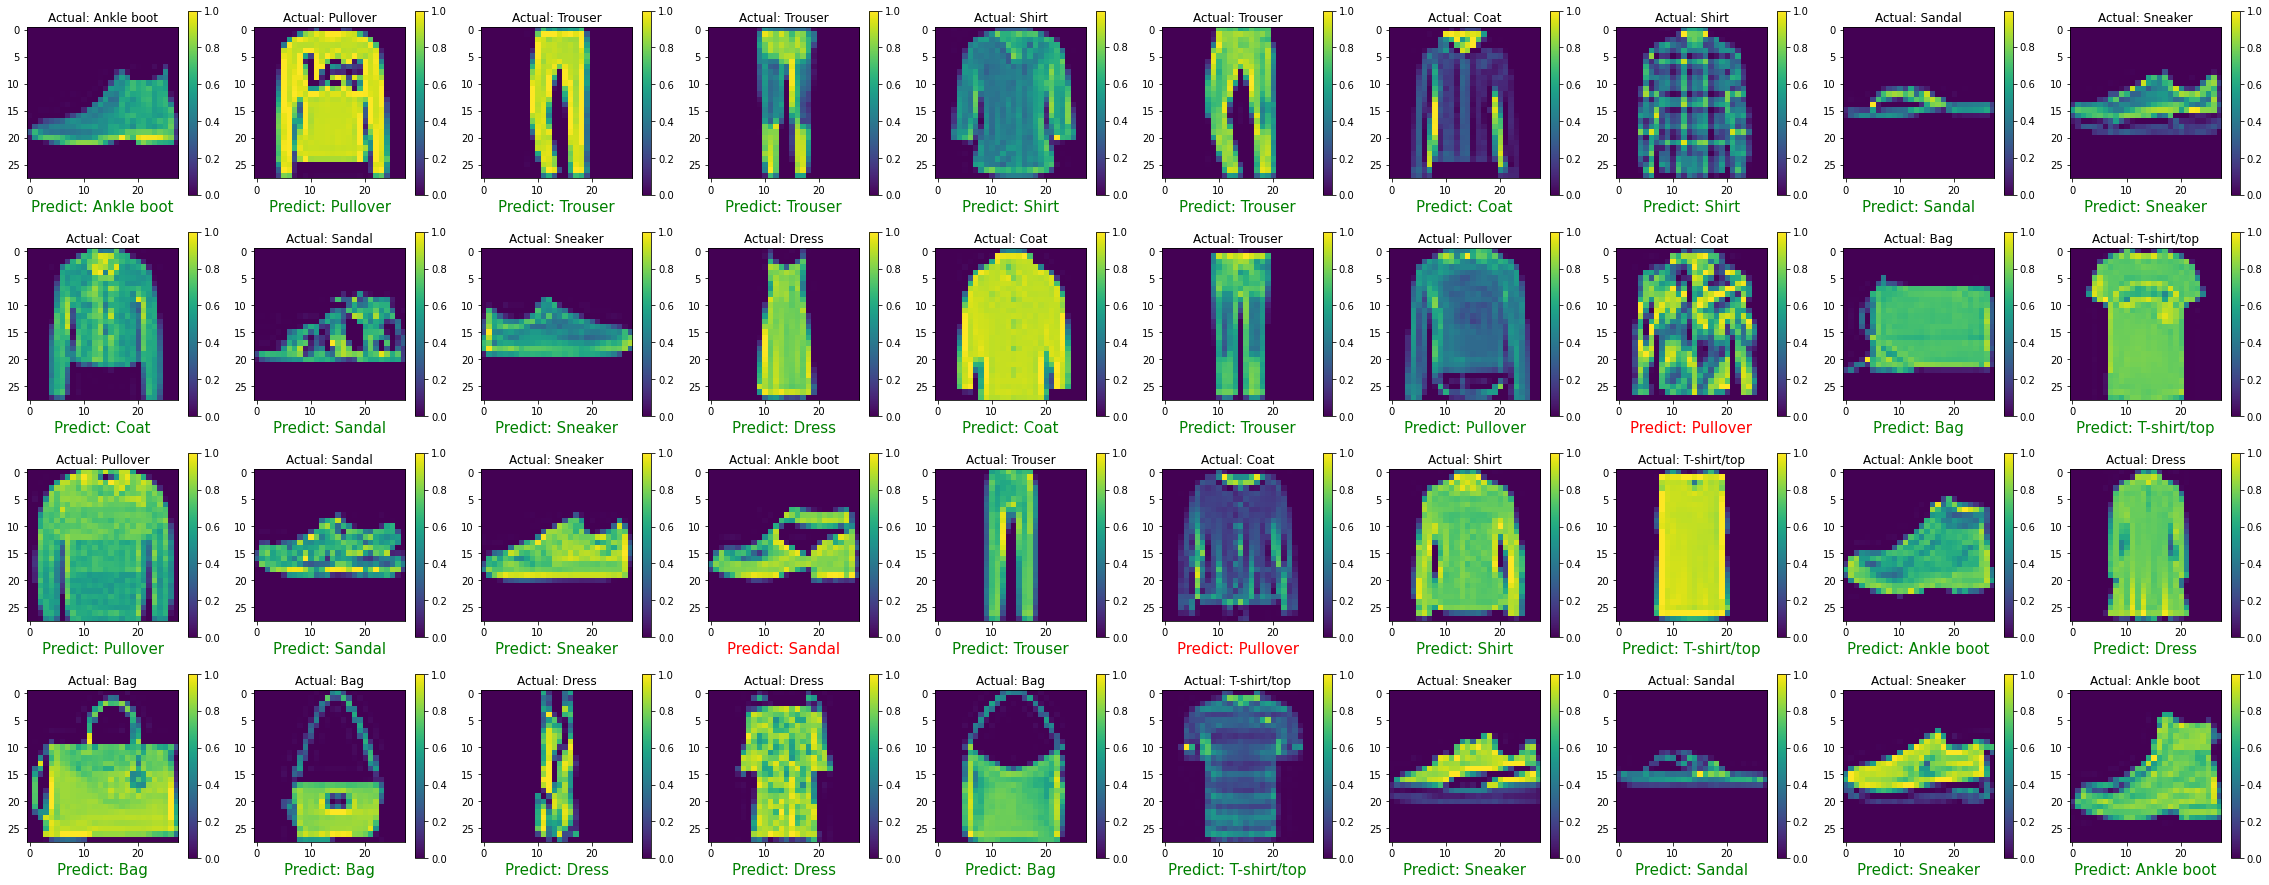

In [72]:
model.predict(x_test)
predictions = model.predict(x_test,verbose=2)
i=0
# Defining Class Names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig = plt.figure(figsize=(40, 40))
for e in zip(y_test, predictions):
  fig.add_subplot(10, 10, i+1)
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  color = 'green' if class_names[y_test[i]] == class_names[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {class_names[y_test[i]]}")
  plt.xlabel(f"Predict: {class_names[np.argmax(predictions[i])]}",color=color,fontsize=15)
  i+=1
  if i == 40:
    break

## Summary

Our model performed nice on training dataset, in 40 data it only missed 3 apparels